In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import operator

train = pd.read_csv('NBA_Train.csv')
test = pd.read_csv('NBA_Test.csv')

In [2]:
#pairwise correlation matrix
corrMatrix = train.corr()
corrMatrix

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
Train_ID,1.000000,-0.077319,0.035220,0.103109,0.028568,0.009902,0.083590,0.014217,0.034160,0.022941,-0.077656,0.121065,0.091162,-0.062032,-0.066823,0.094573,-0.096473,-0.038134,0.051057,-0.008975
SALARY,-0.077319,1.000000,0.053676,0.205137,0.621254,0.670230,0.210184,-0.044877,0.173453,0.097399,0.310137,0.171666,-0.040450,-0.125629,0.619584,0.251895,-0.265725,0.598172,0.626173,0.677791
Age,0.035220,0.053676,1.000000,-0.130769,-0.011434,0.103061,0.230423,-0.079392,0.051784,0.005450,0.085238,-0.007326,-0.034628,0.069458,0.032315,0.167721,-0.117421,0.044857,0.077324,0.060614
Games,0.103109,0.205137,-0.130769,1.000000,0.698624,0.218672,0.222303,-0.038261,-0.069277,-0.060513,0.053769,-0.010948,-0.096862,-0.170734,0.137996,0.283067,-0.108988,0.387794,0.488990,0.470376
Minutes,0.028568,0.621254,-0.011434,0.698624,1.000000,0.542884,0.237121,-0.282746,-0.132087,-0.204198,0.401013,0.195099,-0.234893,-0.220080,0.495164,0.344656,-0.022222,0.661218,0.667567,0.742716
PER,0.009902,0.670230,0.103061,0.218672,0.542884,1.000000,0.496454,0.120051,0.333870,0.270223,0.372109,0.148331,0.097884,-0.199870,0.746413,0.592335,-0.301439,0.827359,0.591449,0.844352
TS,0.083590,0.210184,0.230423,0.222303,0.237121,0.496454,1.000000,0.046193,0.001943,0.026319,-0.023851,0.037649,0.138450,-0.033859,0.032106,0.859295,-0.098838,0.607907,0.216021,0.544868
ORB,0.014217,-0.044877,-0.079392,-0.038261,-0.282746,0.120051,0.046193,1.000000,0.752383,0.902298,-0.500145,-0.346304,0.637900,0.117903,-0.170674,0.087906,-0.482068,-0.085542,0.115089,-0.028135
DRB,0.034160,0.173453,0.051784,-0.069277,-0.132087,0.333870,0.001943,0.752383,1.000000,0.962146,-0.383586,-0.327730,0.601262,-0.034164,0.113351,-0.005146,-0.571812,0.055663,0.297673,0.143840
TRB,0.022941,0.097399,0.005450,-0.060513,-0.204198,0.270223,0.026319,0.902298,0.962146,1.000000,-0.455595,-0.359430,0.655234,0.028525,0.006648,0.035827,-0.582690,0.005620,0.249047,0.088363


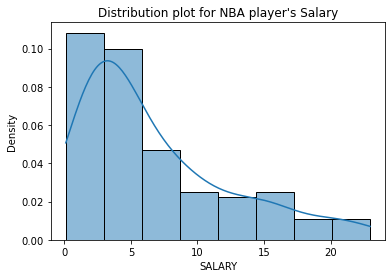

In [3]:
fig, ax= plt.subplots()
sns.histplot(data=train, x='SALARY', kde=True, ax=ax, stat="density", common_norm=False)
ax.set_title("Distribution plot for NBA player's Salary")
plt.savefig("Salary_histogram.png")
plt.show()

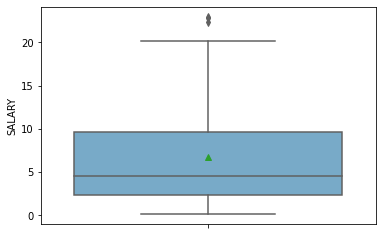

In [4]:
ax = sns.boxplot(y='SALARY', data=train, palette='Blues', showmeans=True)
plt.savefig("Salary_Boxplot.png")

In [5]:
train['SALARY'].describe()

count    126.000000
mean       6.784165
std        5.647912
min        0.111444
25%        2.385205
50%        4.500000
75%        9.591416
max       22.970500
Name: SALARY, dtype: float64

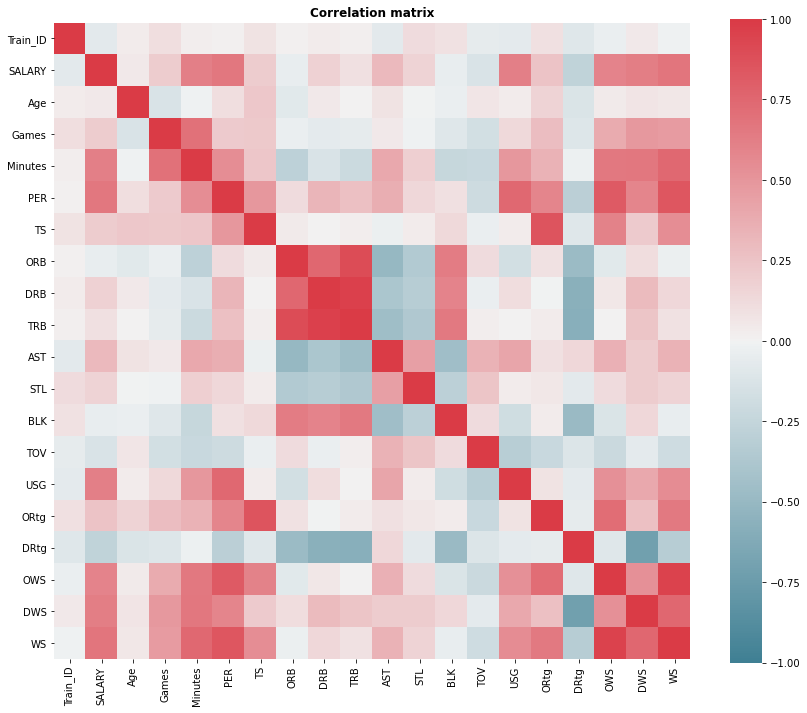

<Figure size 432x288 with 0 Axes>

In [6]:
# correlation heat map
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold')
plt.tight_layout()
plt.savefig("Correlation_matrix.png")
plt.show()
#Since OWS, DWS and WS show possible multicolinearity, we take WS as it has the highest correlation among the three variable
#Since ORB, TRB and DRB show possible multicolinearity, we take DRB as it has the highest correlation among the three variable
#We only take variable with at least 0.5 correlation with SALARY 

dic = {'Minutes':0.621254,'PER':0.670230,'USG':0.619584,'WS':0.677791}
dic_sort = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))

In [7]:
for i in ["WS","PER","Minutes","USG"]:
    print('statistical summary of {}'.format(i)) 
    print(train[i].describe())

statistical summary of WS
count    126.00000
mean       4.18254
std        3.40273
min       -0.10000
25%        1.72500
50%        3.15000
75%        5.57500
max       19.20000
Name: WS, dtype: float64
statistical summary of PER
count    126.000000
mean      14.964286
std        4.306320
min        6.300000
25%       12.425000
50%       14.000000
75%       16.750000
max       29.800000
Name: PER, dtype: float64
statistical summary of Minutes
count     126.000000
mean     1809.015873
std       703.561511
min       393.000000
25%      1290.250000
50%      1859.000000
75%      2405.000000
max      3122.000000
Name: Minutes, dtype: float64
statistical summary of USG
count    126.000000
mean      19.989683
std        4.962094
min        9.300000
25%       16.425000
50%       19.100000
75%       23.275000
max       33.000000
Name: USG, dtype: float64


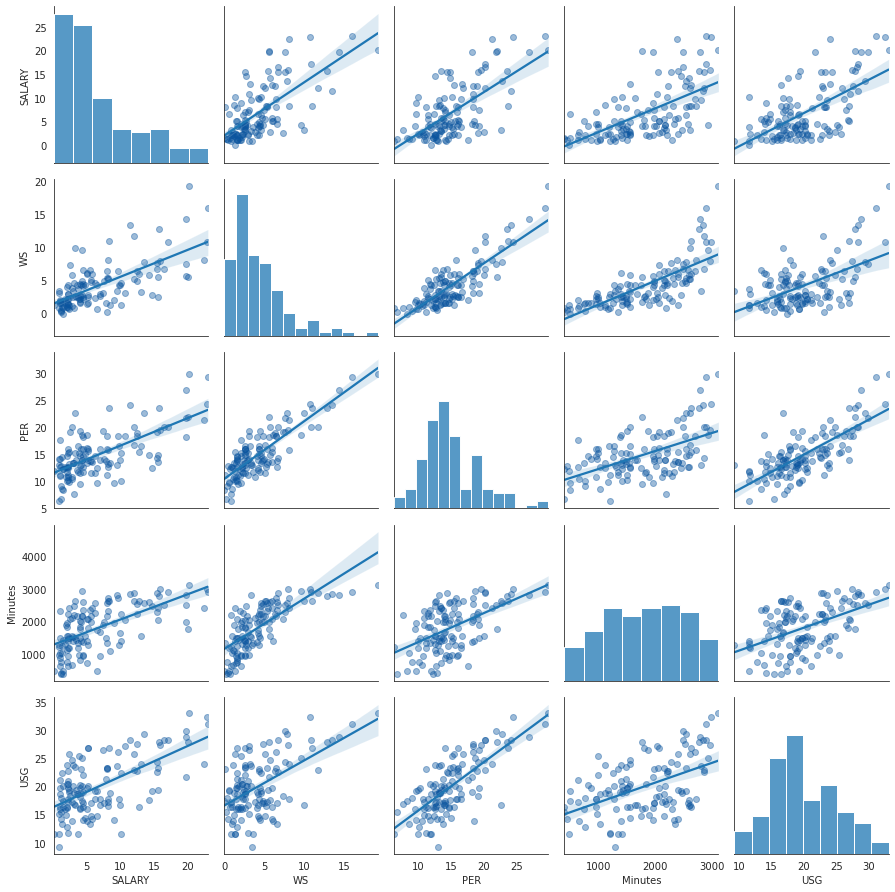

In [22]:
var_selected = ["SALARY","WS","PER","Minutes","USG"]
with sns.axes_style('white'):
    g=sns.pairplot(train[var_selected], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

In [8]:
def knn_test(predictors, response):
    
    neighbours=np.arange(1, 51)
    best_score = -np.inf
    
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': train[predictors].cov()}) 
        # change cv = 10 to cv = loo (loo=LeaveOneOut()) to make CV leave one out model
        scores = cross_val_score(knn, train[predictors], train[response], cv=10, scoring = 'neg_mean_squared_error')
        # taking the average of scores across 10 folds
        cv_score = np.mean(scores)
        # use the cv score for model selection
        if cv_score >= best_score:
            best_score = cv_score
            best_knn = knn
    
    knn = best_knn
    # train the selected model with the whole train set
    knn.fit(train[predictors], train[response])
    # Predict the test data with the selected and re-estimated model
    predictions = knn.predict(test[predictors])
    test_rmse = np.sqrt(mean_squared_error(test[response], predictions))
    cv_rmse= np.sqrt(-best_score)
    print('Chosen K: {}'.format(knn.n_neighbors))
    
    return test_rmse, cv_rmse 

print(dic_sort)
# add variable: 'WS': 0.677791
response = 'SALARY'
predictors = ["WS"]
test_rmse, cv_rmse = knn_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'PER': 0.67023
response = 'SALARY'
predictors = ["WS","PER"]
test_rmse, cv_rmse = knn_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'Minutes': 0.621254
response = 'SALARY'
predictors = ["WS","Minutes"]
test_rmse, cv_rmse = knn_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'Minutes': 0.621254, 'USG': 0.619584
response = 'SALARY'
predictors = ["WS","Minutes","USG"]
test_rmse, cv_rmse = knn_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# Find MAE and R^2 

predictors = ["WS","Minutes"]
knn = KNeighborsRegressor(n_neighbors = 24, metric='mahalanobis', metric_params={'V': train[predictors].cov()})
model = knn.fit(train[predictors], train[response])
pre = model.predict(test[predictors])

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['SALARY'], pre)
rmse = np.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
rsquared = r2_score(test['SALARY'], pre)
print(rsquared)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['SALARY'], pre)
print(mae)

{'WS': 0.677791, 'PER': 0.67023, 'Minutes': 0.621254, 'USG': 0.619584}
Chosen K: 22
Test RMSE: 4.208833599153995 for 1 predictors
CV RMSE: 4.289985227772958 for 1 predictors
Chosen K: 22
Test RMSE: 4.4035397102088485 for 2 predictors
CV RMSE: 4.351797542997135 for 2 predictors
Chosen K: 24
Test RMSE: 4.1955463171290655 for 2 predictors
CV RMSE: 4.253109094545757 for 2 predictors
Chosen K: 7
Test RMSE: 4.6919649849186165 for 3 predictors
CV RMSE: 3.903302275987654 for 3 predictors
4.1955463171290655
0.40988794688549146
3.1911198713910767


In [9]:
#Since OWS, DWS and WS show possible multicolinearity, we take WS as it has the highest correlation among the three variable
#Since ORB, TRB and DRB show possible multicolinearity, we take DRB as it has the highest correlation among the three variable
#Remove Train ID
exclude=['OWS','DWS','ORB','TRB','Train_ID']
response = ['SALARY']
predictors=[x for x in list(train.columns) if x not in exclude] # building a list a predictors
print(predictors)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy import stats

# Initial model
formula='SALARY ~ POSITION + TEAM + Age + Games + Minutes + PER + TS + DRB + AST + STL + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

['SALARY', 'POSITION', 'TEAM', 'Age', 'Games', 'Minutes', 'PER', 'TS', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4.782
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           5.94e-10
Time:                        15:40:22   Log-Likelihood:                -310.99
No. Observations:                 126   AIC:                             718.0
Df Residuals:                      78   BIC:                             854.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         33.6907     32.247      1.045      0.299     -30.508      97.889
POSITION[T.PF]                    -1.4864      1.444     -1.030      0.306      -4.360       1.388
POSITION[T.PG]                    -3.2772      2.513     -1.304      0.196      -8.280       1.726
POSITION[T.SF]                    -1.3939      1.888     -0.738      0.462      -5.152       2.364
POSITION[T.SG]                    -1.0617      2.032     -0.523      0.603      -5.106       2.983
TEAM[T.Boston Celtics]             1.2241      3.158      0.388      0.699      -5.063       7.512
TEAM[T.Brooklyn Nets]             -0.3284      2.953     -0.111      0.912      -6.207       5.550
TEAM[T.Charlotte Hornets]         -0.0385      2.691     -0.014      0.989      -5.396       5.319
TEAM[T.Chicago Bulls]             -1.9554      2.948     -0.663      0.509      -7.825       3.914
TEAM[T.Cleveland Cavaliers]        4.2469      2.817      1.508      0.136      -1.360       9.854
TEAM[T.Dallas Mavericks]           0.1530      3.077      0.050      0.960      -5.973       6.279
TEAM[T.Denver Nuggets]             0.3871      4.557      0.085      0.933      -8.686       9.460
TEAM[T.Detroit Pistons]           -1.5903      3.015     -0.527      0.599      -7.593       4.412
TEAM[T.Golden State Warriors]     -0.1785      3.276     -0.054      0.957      -6.701       6.344
TEAM[T.Houston Rockets]            0.5454      2.701      0.202      0.840      -4.831       5.922
TEAM[T.Indiana Pacers]            -1.5103      3.209     -0.471      0.639      -7.900       4.879
TEAM[T.Los Angeles Clippers]      -0.5447      3.713     -0.147      0.884      -7.936       6.847
TEAM[T.Los Angeles Lakers]         0.5954      3.463      0.172      0.864      -6.299       7.490
TEAM[T.Memphis Grizzlies]          0.2249      2.681      0.084      0.933      -5.112       5.562
TEAM[T.Miami Heat]                 1.8709      2.996      0.624      0.534      -4.094       7.836
TEAM[T.Milwaukee Bucks]            0.9432      3.110      0.303      0.762      -5.248       7.134
TEAM[T.Minnesota Timberwolves]     5.5877      3.945      1.416      0.161      -2.267      13.443
TEAM[T.New Orleans Pelicans]       1.9402      3.042      0.638      0.525      -4.115       7.996
TEAM[T.New York Knicks]            1.8117      3.083      0.588      0.558      -4.326       7.950
TEAM[T.Oklahoma City Thunder]     -0.1627      2.932     -0.055      0.956      -6.000       5.675
TEAM[T.Orlando Magic]              2.0067      3.120      0.643      0.522      -4.205       8.219
TEAM[T.Philadelphia 76ers]         3.8728      4.271      0.907      0.367      -4.631      12.376
TEAM[T.Phoenix Suns]              -4.8879      4.506     -1.085      0.281     -13.859       4.084
TEAM[T.Portlan

In [10]:
#Remove a variable with P>|t| > 0.05, and refit the new model, stop when all the variable P>|t| < 0.05
#Remove TEAM
formula='SALARY ~ POSITION + Age + Games + Minutes + PER + TS + DRB + AST + STL + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove PER
formula='SALARY ~ POSITION + Age + Games + Minutes + TS + DRB + AST + STL + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove DRB
formula='SALARY ~ POSITION + Age + Games + Minutes + TS + AST + STL + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove AST
formula='SALARY ~ POSITION + Age + Games + Minutes + TS + STL + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove STL
formula='SALARY ~ POSITION + Age + Games + Minutes + TS + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove POSITION
formula='SALARY ~ Age + Games + Minutes + TS + BLK + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove BLK
formula='SALARY ~ Age + Games + Minutes + TS + TOV + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove TOV
formula='SALARY ~ Age + Games + Minutes + TS + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove Age
formula='SALARY ~ Games + Minutes + TS + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove TS
formula='SALARY ~ Games + Minutes + USG + ORtg + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

#Remove ORtg
formula='SALARY ~ Games + Minutes + USG + DRtg + WS'
MLR_model = smf.ols(formula=formula, data=train).fit()
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     43.25
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           2.66e-25
Time:                        15:40:22   Log-Likelihood:                -331.51
No. Observations:                 126   AIC:                             675.0
Df Residuals:                     120   BIC:                             692.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1388     10.827      3.523      0.001      16.702      59.575
Games         -0.1807      0.041     -4.446      0.000      -0.261      -0.100
Minutes        0.0048      0.001      5.262      0.000       0.003       0.007
USG            0.2837      0.079      3.573      0.001       0.126       0.441
DRtg          -0.3237      0.096     -3.357      0.001      -0.515      -0.133
WS             0.3266      0.161      2.025      0.045       0.007       0.646
==============================================================================
Omnibus:                        4.409   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.838
Skew:                           0.367   Prob(JB):                        0.147
Kurtosis:                       3.437   Cond. No.                     6.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Final model
formula='SALARY ~ Games + Minutes + USG + DRtg + WS'
Final_model = smf.ols(formula=formula, data=train).fit()
print(Final_model.summary())
print(Final_model.mse_resid**0.5)


var_selected = ['Games','Minutes','USG','DRtg','WS']

predictions = Final_model.predict(test[var_selected])

formula='SALARY ~ predictions'
Final_ols = smf.ols(formula=formula, data=test).fit()
print(Final_ols.summary())
print(Final_ols.mse_resid**0.5)

test_RMSE = np.sqrt(mean_squared_error(test['SALARY'], predictions))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['SALARY'], predictions)
print("test_RMSE: {}".format(test_RMSE))
print("Adj_R^2: {}".format(Final_ols.rsquared_adj))
print("R^2: {}".format(Final_ols.rsquared))
print("MAE:{}".format(mae))

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     43.25
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           2.66e-25
Time:                        15:41:07   Log-Likelihood:                -331.51
No. Observations:                 126   AIC:                             675.0
Df Residuals:                     120   BIC:                             692.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1388     10.827      3.523      0.0

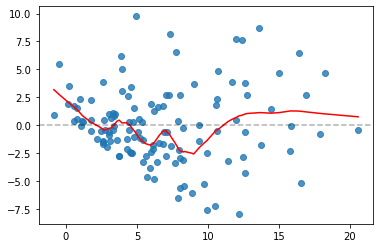

In [13]:
#Check the MLR assumption
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

#Residual vs fitted plot and lowess
sns.regplot(x=Final_model.fittedvalues, y=Final_model.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(Final_model.resid,Final_model.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')
plt.savefig("Residual_plot.png")

In [14]:
stats.describe(Final_model.resid)

DescribeResult(nobs=126, minmax=(-7.914143585881516, 9.755356632903275), mean=2.6433881538694204e-15, variance=11.383627710930508, skewness=0.36747472462656905, kurtosis=0.43684537020676695)

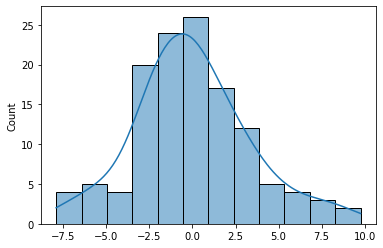

In [15]:
sns.histplot(Final_model.resid, kde=True)
plt.savefig("Residual_histplot.png")

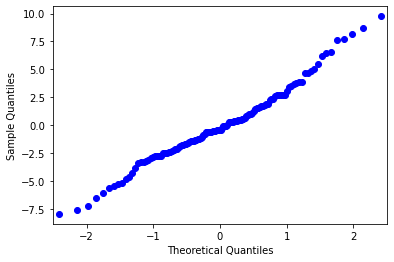

In [16]:
qq = sm.qqplot(Final_model.resid)

Text(0.5, 1.0, 'fitted values vs residuals')

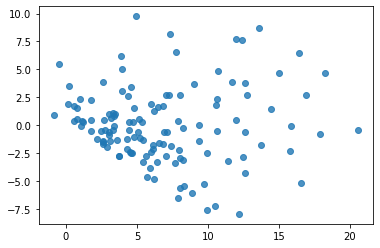

In [24]:
#Residual vs fitted plot
sns.regplot(x=Final_model.fittedvalues, y=Final_model.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')

In [17]:
var_selected = ['Games','Minutes','USG','DRtg','WS']

#check for collinearity
features = train[var_selected]
features = sm.add_constant(features) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(5):
    vif.append(variance_inflation_factor(features.values, i+1))
print("VIF: {}, VIF mean: {}".format(vif,np.mean(vif)))

VIF: [2.274979965938495, 4.408010969507198, 1.636099278279733, 1.3275203719136877, 3.1757005833344203], VIF mean: 2.5644622337947065


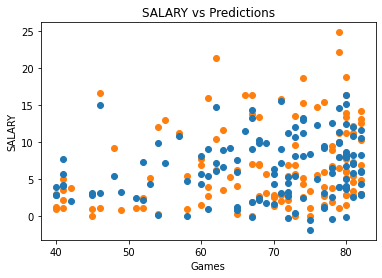

In [18]:
#Accuracy
fig,ax = plt.subplots()
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
plt.scatter(test['Games'], test['SALARY'], color=tableau[1]) 
plt.scatter(test['Games'], predictions) 
ax.set_title('SALARY vs Predictions')
plt.xlabel('Games')
plt.ylabel('SALARY')
plt.savefig("Accuracy_plot.png")

In [19]:
# Use random forest estimators
# Import the random forest
from sklearn.ensemble import RandomForestRegressor

def random_tree_test(predictors, response):
    
    estimators=np.arange(1, 51)
    best_score = -np.inf
    
    for k in estimators: 
        rf = RandomForestRegressor(n_estimators = k, random_state = 1) 
        # change cv = 10 to cv = loo (loo=LeaveOneOut()) to make CV leave one out model
        scores = cross_val_score(rf, train[predictors], train[response], cv=10, scoring = 'neg_mean_squared_error')
        # taking the average of scores across 10 folds
        cv_score = np.mean(scores)
        # use the cv score for model selection
        if cv_score >= best_score:
            best_score = cv_score
            best_rf = rf
    
    rf = best_rf
    # train the selected model with the whole train set
    rf.fit(train[predictors], train[response])
    # Predict the test data with the selected and re-estimated model
    predictions = rf.predict(test[predictors])
    test_rmse = np.sqrt(mean_squared_error(test[response], predictions))
    cv_rmse= np.sqrt(-best_score)
    print('Chosen Estimator: {}'.format(rf.n_estimators))
    
    return test_rmse, cv_rmse 

print(dic_sort)
# add variable: 'WS': 0.677791
response = 'SALARY'
predictors = ["WS"]
test_rmse, cv_rmse = random_tree_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'PER': 0.67023
response = 'SALARY'
predictors = ["WS","PER"]
test_rmse, cv_rmse = random_tree_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'PER': 0.67023, 'Minutes': 0.621254
response = 'SALARY'
predictors = ["WS","PER","Minutes"]
test_rmse, cv_rmse = random_tree_test(predictors, response)
print("Test RMSE: {} for {} predictors".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} predictors".format(cv_rmse,len(predictors)))

# add variable: 'WS': 0.677791, 'PER': 0.67023, 'Minutes': 0.621254, 'USG': 0.619584
response = 'SALARY'
predictors = ["WS","PER","Minutes","USG"]
test_rmse, cv_rmse = random_tree_test(predictors, response)
print("Test RMSE: {} for {} estimators".format(test_rmse,len(predictors)))
print("CV RMSE: {} for {} estimators".format(cv_rmse,len(predictors)))

{'WS': 0.677791, 'PER': 0.67023, 'Minutes': 0.621254, 'USG': 0.619584}
Chosen Estimator: 20
Test RMSE: 4.928496667874755 for 1 predictors
CV RMSE: 4.757385619878182 for 1 predictors
Chosen Estimator: 13
Test RMSE: 4.960833049318086 for 2 predictors
CV RMSE: 4.451986121840191 for 2 predictors
Chosen Estimator: 11
Test RMSE: 4.750409923369888 for 3 predictors
CV RMSE: 4.20133397536379 for 3 predictors
Chosen Estimator: 13
Test RMSE: 4.595341149160933 for 4 estimators
CV RMSE: 4.189384524225946 for 4 estimators


In [20]:
# Find MAE and R^2 
predictors = ["WS","PER","Minutes","USG"]
rf = RandomForestRegressor(n_estimators = 13, random_state = 1)
model = rf.fit(train[predictors], train[response])
pre = model.predict(test[predictors])

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['SALARY'], pre)
rmse = np.sqrt(mse)
print(rmse)

from sklearn.metrics import r2_score
rsquared = r2_score(test['SALARY'], pre)
print(rsquared)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['SALARY'], pre)
print(mae)

4.595341149160933
0.29206568875743155
3.5192312180496668
